# Regression Exercise
Using Regression to predict wine quality.

## Import Our Libraries

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stats
%matplotlib inline 

# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/winequality-white.csv`

In [22]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/winequality-white.csv')

# DISPLAY THE FIRST 5 ROWS

# Inspect our data using `df.describe()` function.

In [3]:
# Inspect our data using `df.describe()` function.
df.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4893.000000       4893.000000  4893.000000     4893.000000   
mean        6.854210          0.278221     0.334139        6.393736   
std         0.843637          0.100831     0.121048        5.072990   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide           pH  \
count  4893.000000          4893.000000           4893.000000  4893.000000   
mean      0.045791            35.310035            138.383507     3.188144   
std       0.021850            17.011384             42.509982     0.151011   
min       0.009000             2.000000              9.000000     2.720000   
25%       0.036000            23.000000            108.000000     3.090000   
50%       0.043000            34.000000            134.000000     3.180000   
75%       0.050000            46.000000            167.000000     3.280000   
max       0.346000           289.000000            440.000000     3.820000   

         sulphates      alcohol      quality  
count  4893.000000  4893.000000  4893.000000  
mean      0.489871    10.512565     5.874719  
std       0.114151     1.229755     0.880446  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.000000  
50%       0.470000    10.400000     6.000000  
75%       0.550000    11.400000     6.000000  
max       1.080000    14.200000     8.000000

# Check for Nulls.

In [4]:
# Check for Nulls.
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Check for Duplicates

In [6]:
# Check for Duplicates
dups = df.duplicated()



937

In [8]:
# Remove duplicates
print(df.shape)

df = df[~df.duplicated()]

# Sanity check
print(df.shape)

(4893, 11)
(3956, 11)


# Visualize our data to discover outliers.
* Use `sns.pariplot`

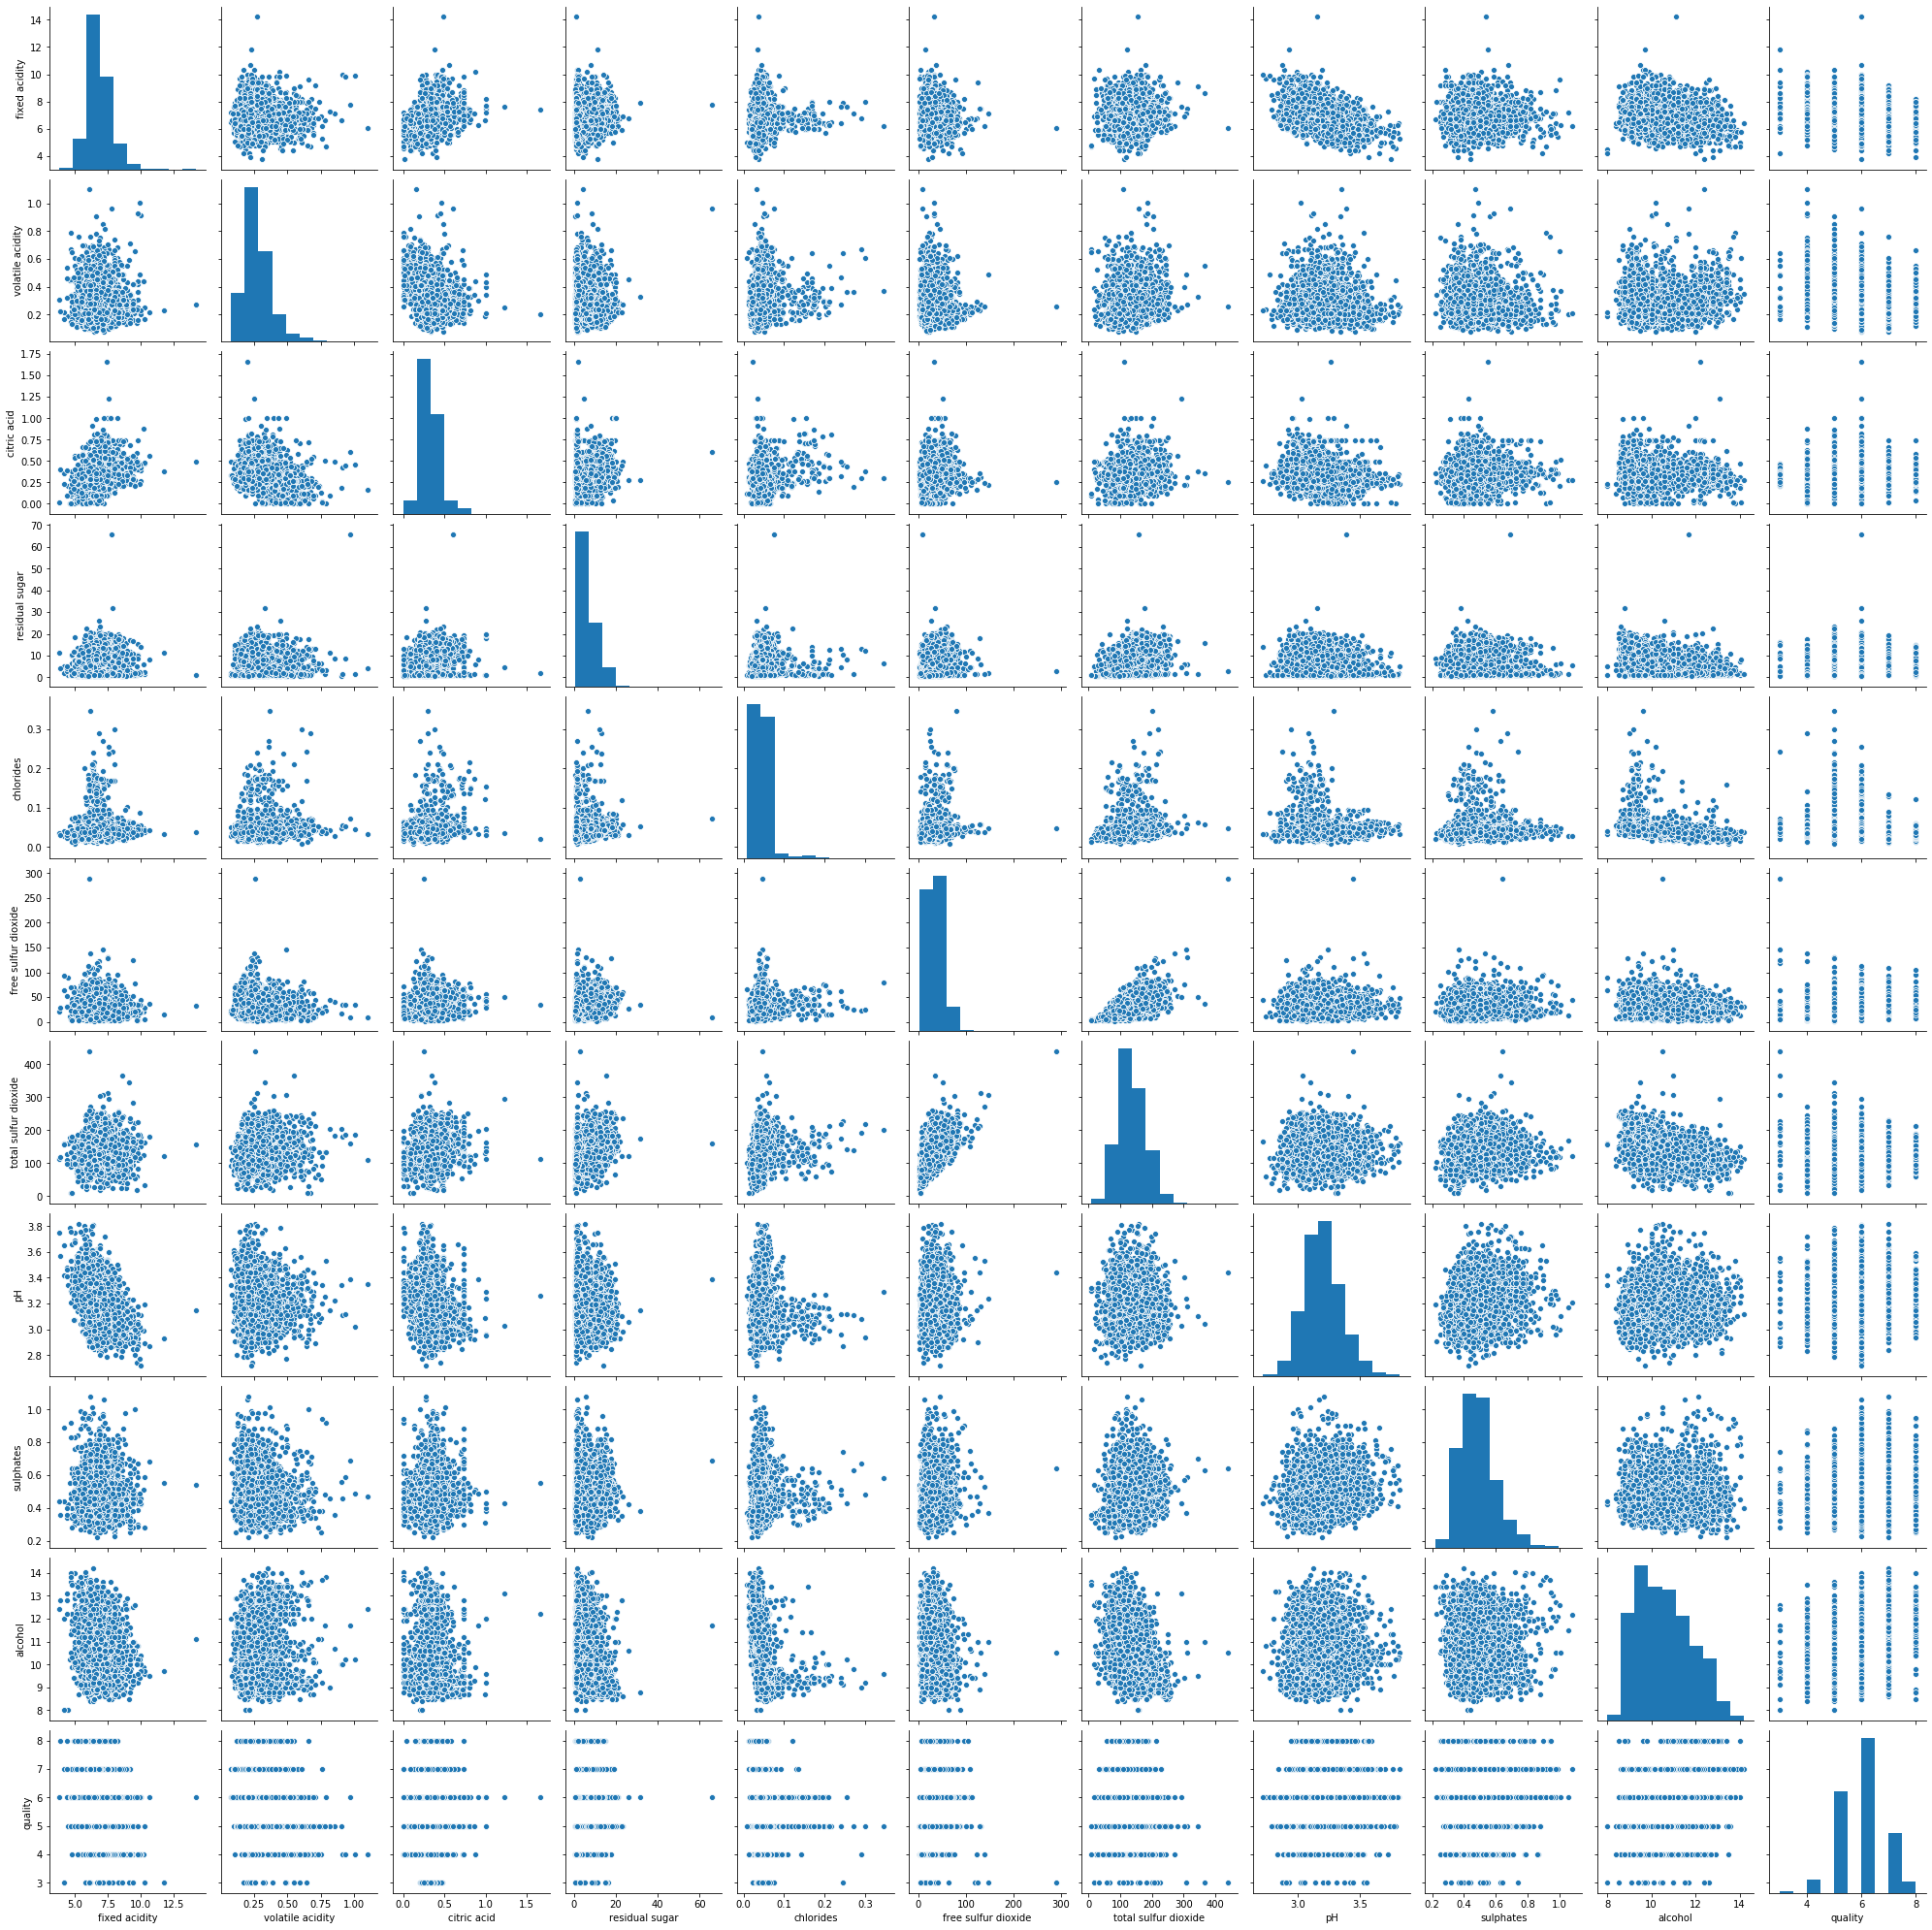

In [10]:
# Visualize our data to discover outliers.
sns.pairplot(data=df)
plt.show()

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

___
# STEP 2  (s):  Select and Engineer Features

# Remove outliers
* Make sure you DO NOT remove outliers from our target variable of `quality`.

In [23]:
# Keep this for later
original_cols = df.columns

# Set the columns you want to remove outliers for
target_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality']

# Make a new list that is going to contain our z-score
z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_col = col+'z_score'
    z_score_cols.append(new_col)
    
    # Set the new column equal to the score && make it absolute 
    df[new_col] = abs(stats.stats.zscore( df[col] ))
    
    # Set the z-score to its absolute value of the for easier filtering

    
    # Append the new column name our our z_score_cols list for easier access for later.



condition = df[z_score_cols] < 3

# Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

# Apply our condition to our dataframe and replace our current dataframe with the applied condition.
df = df[condition]

print('After removal of outliers', df.shape)

Before removal of outliers (4893, 22)
After removal of outliers (4487, 22)


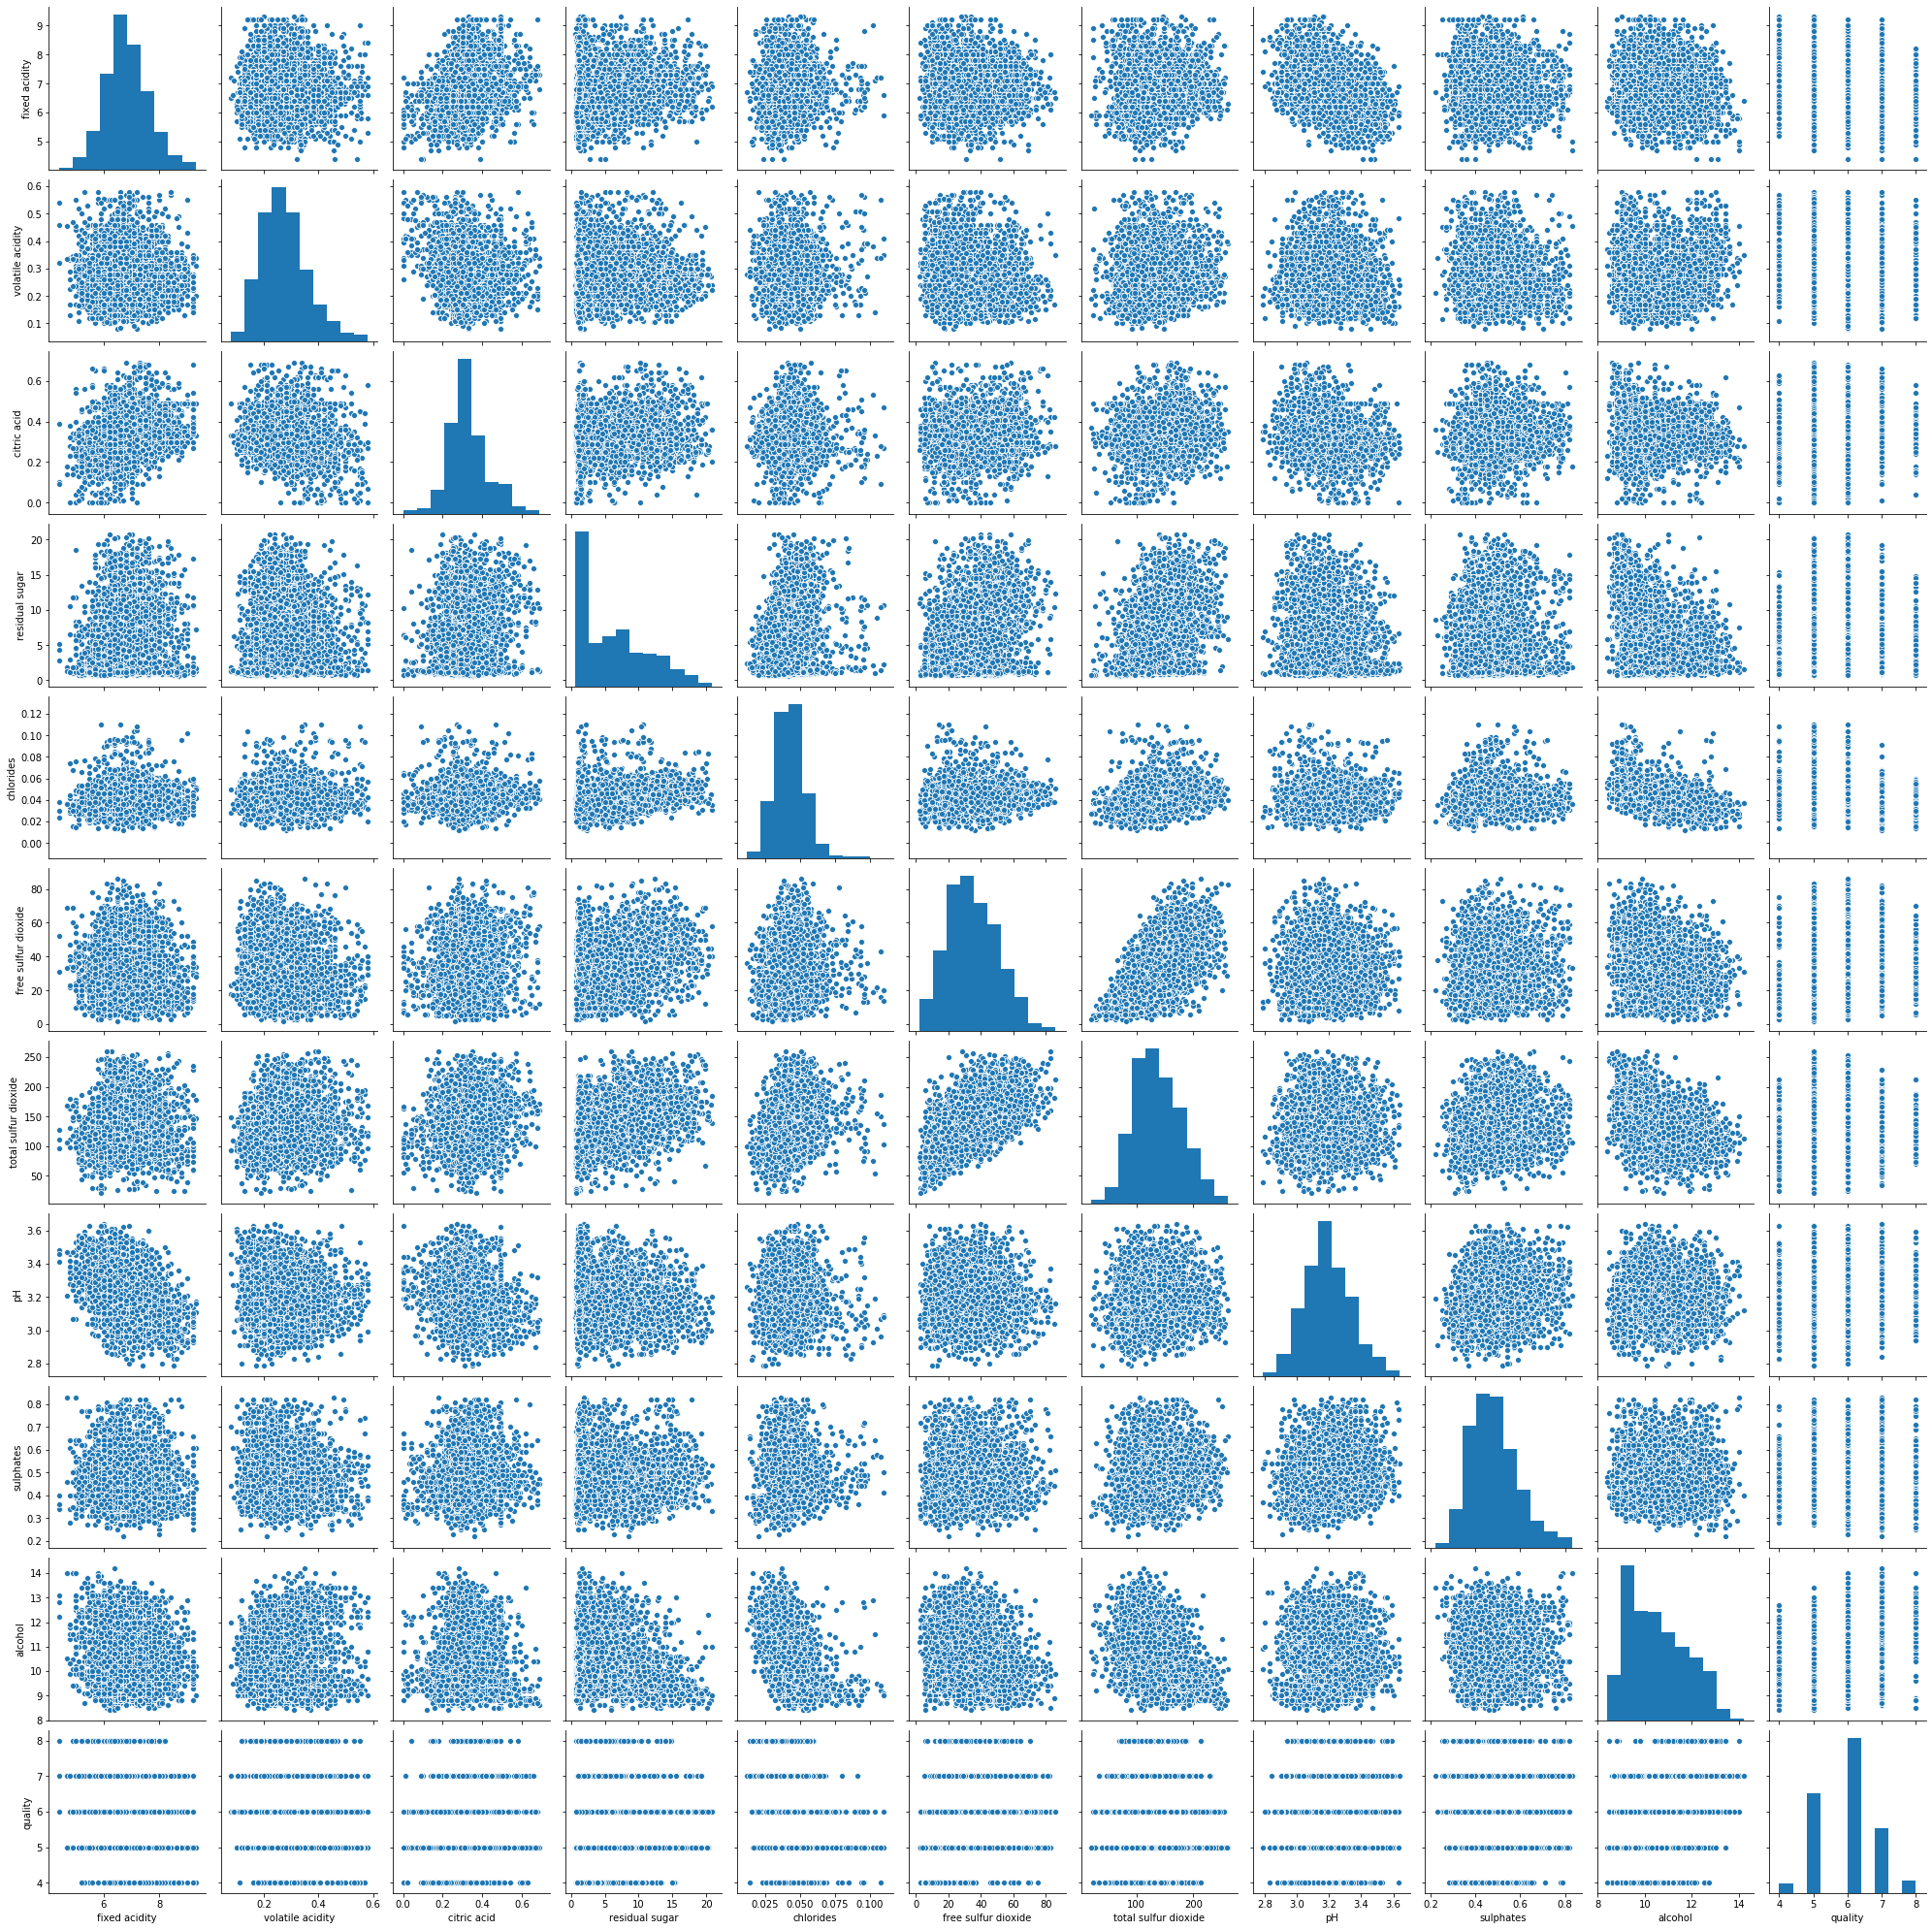

In [24]:
# Keep only original columns
df = df[original_cols]

# Visualize using sns.pairplot again to see if outliers were removed. 
sns.pairplot(df)

# Find which features have a linear relationship with quality.
* Plot below the linear relationship between each variable against quality.
* Use `sns.relplot`

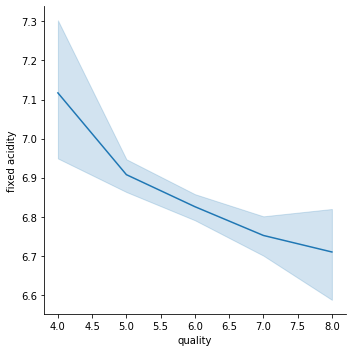

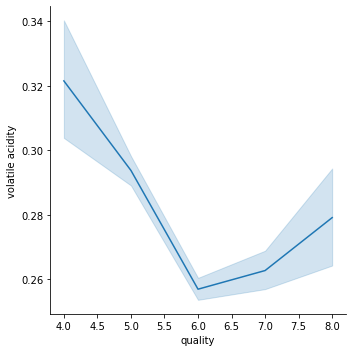

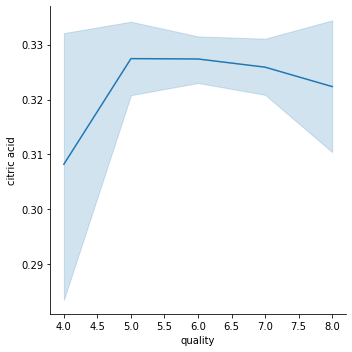

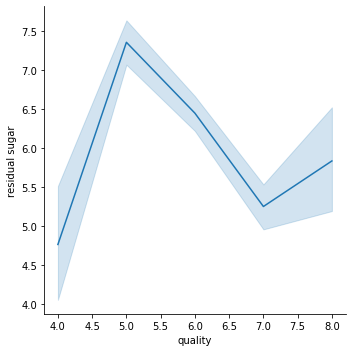

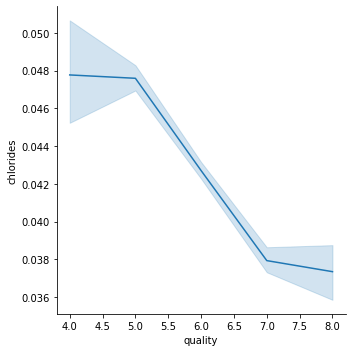

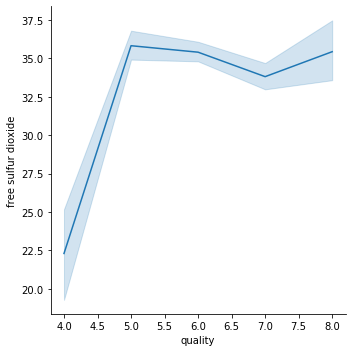

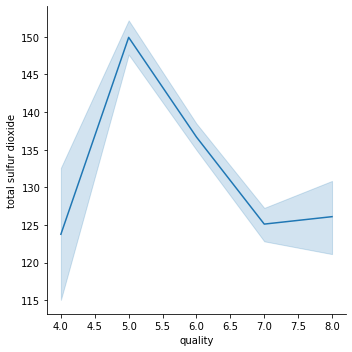

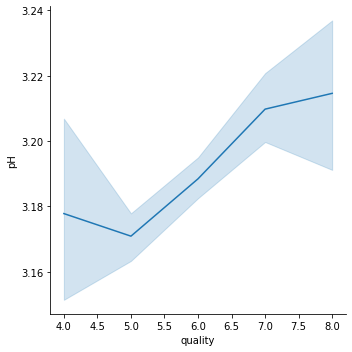

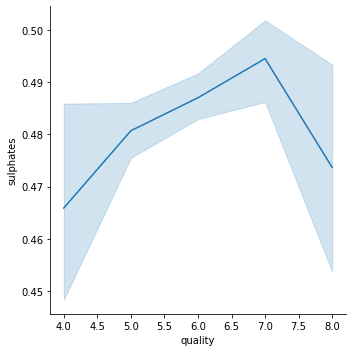

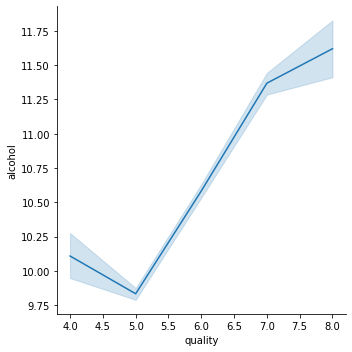

In [25]:
# Plot below the linear relationship between each variable against quality

all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# YOURE GOING TO NEED TO USE A LOOP
for feature in all_features:
    sns.relplot(data = df, y = feature, x = 'quality', kind='line', height=5, aspect=1)

# Select your predictor features and your target variable.
1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
2. Define your `X` and `y` variables
3. Split our data into a training set and a testing set.

In [28]:
# 1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
selected_features = ['fixed acidity', 'pH','alcohol','chlorides','volatile acidity']

 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates'

In [29]:
# Define your X and y variables
X = df[selected_features].values


# 
y = df['quality'].values

In [30]:
# 3. Split our data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

___
# STEP 3 (b): Build and train our model
1. Initialize our Linear Regression model.
2. Use our training data to fit aka train our model.


In [31]:
# 1. Initialize our Linear Regression model.
model = LinearRegression()


In [32]:
# 2. Use our training data to fit aka train our model.
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# STEP 4 (e): Evaluate model.
1. Make new predicitions using our testing data.
2. Calculate R-Squared and Mean Absolute Error socres

In [33]:
# 1. Make new predicitions using our testing data.
y_pred = model.predict(X_test)

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model. 
* How well the trendline explains the variance of the data. 
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember for human labeled data like the quality of wine, .3 is pretty good.

In [34]:
# 2. Calculate R-Squared and Mean Absolute Error socres

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.23354170621122983
Mean Absolute Error: 0.5916655014705688


# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [35]:
import pickle

# NAME YOUR MODEL 
filename = 'white-wine-model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(model, open(filename, 'wb'))

___
# Random Forest Regression

Without step by step guidance, in the cell below, build a Random Forest Regression model and compare the r-squared and mean absolute error scores to the Linear Regression model.
* Dont forget, Random Forest can handle non-linear features!

* When splitting your data, make sure to use the same random state as you did for your Linear Regression model
    * `train_test_split(???, random_state=1)`

* Dont forget about `GridSearchCV` from our last lecture :) 

1. Which model proved to have better scores.
2. Why do you think that is...?


In [53]:
# Do complete Random Forest Regression model here...
import time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier
tic = time.perf_counter()
selected_features = ['citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

model = RandomForestRegressor(random_state=1)

X = df[selected_features].values
y= df['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
params = {
    'criterion' : ['mse'],
     'max_features':['auto','sqrt'],
    'max_depth': [2, 5, 7, 10,100], 
    'min_samples_split': [2,5, 10, 20, 100],
    'min_samples_leaf': [1,5, 10, 20, 30],
         }
grid_search_cv = GridSearchCV( 
    estimator=RandomForestRegressor(), 
    param_grid=params,
    scoring='r2' )
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_estimator_)
toc = time.perf_counter()
print(f"Downloaded the tutorial in {toc - tic:0.4f} seconds")
#

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Downloaded the tutorial in 18972.6128 seconds


In [58]:
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
X = df[selected_features].values
y= df['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(y_test)
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)


# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# 1. Which model proved to have better scores.


print('Your answer here')

ValueError: Expected 2D array, got 1D array instead:
array=[7. 6. 8. 5. 7. 7. 7. 7. 7. 6. 6. 6. 7. 6. 7. 6. 6. 5. 7. 7. 6. 6. 6. 5.
 7. 4. 5. 5. 6. 5. 6. 7. 6. 5. 6. 7. 5. 4. 6. 6. 7. 7. 6. 7. 6. 6. 6. 5.
 4. 6. 5. 6. 5. 5. 6. 6. 5. 5. 6. 7. 5. 6. 5. 7. 6. 5. 6. 7. 5. 5. 6. 7.
 5. 6. 6. 6. 7. 6. 7. 7. 6. 5. 7. 6. 7. 6. 7. 8. 6. 6. 5. 5. 6. 6. 7. 6.
 7. 6. 7. 6. 6. 5. 7. 6. 6. 6. 5. 5. 6. 5. 8. 7. 6. 5. 7. 5. 5. 6. 5. 7.
 5. 4. 5. 6. 6. 5. 6. 5. 6. 7. 7. 5. 5. 6. 7. 7. 5. 5. 6. 5. 5. 6. 5. 5.
 6. 5. 6. 6. 5. 7. 6. 6. 5. 6. 7. 6. 7. 5. 6. 6. 6. 5. 5. 4. 6. 7. 6. 5.
 5. 6. 7. 7. 5. 5. 6. 7. 6. 6. 7. 5. 5. 6. 6. 6. 5. 5. 4. 6. 6. 5. 6. 7.
 4. 6. 6. 6. 6. 5. 6. 7. 6. 4. 6. 6. 7. 6. 6. 6. 5. 6. 5. 5. 6. 5. 6. 6.
 6. 5. 6. 5. 8. 7. 6. 5. 6. 6. 6. 7. 7. 8. 5. 6. 7. 6. 5. 5. 5. 6. 6. 5.
 7. 7. 5. 5. 5. 6. 6. 5. 5. 5. 5. 5. 5. 6. 6. 6. 7. 5. 6. 6. 6. 5. 4. 7.
 6. 5. 6. 5. 6. 7. 8. 6. 6. 8. 5. 6. 6. 5. 6. 6. 5. 5. 6. 6. 5. 6. 8. 6.
 6. 7. 5. 7. 6. 6. 7. 4. 7. 7. 6. 6. 6. 6. 5. 6. 7. 6. 5. 6. 7. 6. 7. 6.
 6. 7. 7. 6. 6. 8. 7. 6. 7. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 5. 5. 6.
 7. 6. 5. 7. 8. 7. 6. 6. 6. 6. 7. 7. 5. 6. 6. 6. 5. 6. 6. 7. 6. 6. 6. 6.
 7. 7. 5. 5. 6. 6. 6. 5. 7. 5. 6. 6. 5. 6. 6. 6. 5. 6. 8. 7. 6. 5. 5. 5.
 5. 5. 5. 7. 6. 6. 7. 7. 6. 5. 6. 6. 7. 7. 7. 8. 5. 6. 6. 6. 6. 6. 6. 6.
 7. 7. 5. 6. 5. 4. 6. 6. 7. 6. 7. 7. 5. 5. 5. 6. 6. 5. 7. 6. 6. 7. 6. 7.
 6. 6. 7. 6. 6. 6. 6. 6. 5. 7. 6. 5. 7. 7. 5. 6. 6. 6. 5. 5. 7. 5. 6. 5.
 5. 5. 5. 6. 5. 5. 7. 7. 7. 6. 6. 6. 5. 6. 5. 6. 7. 6. 6. 6. 6. 5. 4. 7.
 5. 8. 6. 6. 5. 6. 6. 6. 5. 6. 5. 5. 5. 7. 7. 7. 6. 5. 8. 5. 7. 5. 6. 7.
 6. 6. 5. 6. 7. 6. 5. 5. 6. 5. 6. 5. 8. 5. 5. 6. 6. 6. 6. 8. 5. 6. 6. 6.
 6. 7. 5. 8. 5. 6. 6. 5. 6. 6. 5. 7. 5. 6. 4. 7. 6. 6. 5. 5. 6. 6. 6. 5.
 6. 6. 6. 8. 6. 6. 5. 5. 8. 6. 7. 7. 6. 5. 5. 4. 5. 6. 5. 4. 7. 7. 6. 6.
 5. 7. 6. 8. 7. 7. 7. 7. 6. 5. 5. 6. 7. 6. 5. 7. 7. 6. 5. 5. 6. 6. 6. 6.
 7. 6. 7. 6. 5. 6. 6. 6. 6. 6. 6. 7. 5. 7. 5. 6. 7. 5. 5. 6. 6. 5. 6. 6.
 7. 7. 6. 7. 5. 4. 5. 5. 6. 5. 6. 6. 5. 5. 5. 7. 6. 8. 5. 7. 6. 7. 6. 6.
 5. 5. 6. 6. 5. 5. 6. 8. 5. 6. 7. 5. 6. 6. 7. 6. 6. 7. 6. 6. 6. 6. 5. 6.
 6. 6. 7. 6. 5. 5. 5. 6. 6. 6. 7. 7. 6. 6. 6. 6. 6. 6. 6. 6. 7. 5. 6. 7.
 6. 5. 5. 5. 6. 5. 6. 7. 6. 6. 5. 5. 6. 5. 6. 6. 6. 7. 7. 6. 4. 7. 6. 6.
 6. 6. 6. 7. 7. 5. 7. 5. 6. 6. 7. 6. 6. 5. 6. 6. 7. 5. 6. 7. 4. 7. 6. 7.
 7. 6. 8. 7. 6. 7. 6. 6. 8. 7. 7. 8. 7. 5. 5. 6. 7. 6. 5. 5. 5. 6. 6. 6.
 6. 6. 6. 6. 6. 8. 8. 5. 5. 5. 6. 7. 6. 7. 5. 6. 5. 6. 6. 6. 6. 4. 6. 8.
 6. 8. 6. 5. 6. 6. 7. 4. 5. 7. 6. 6. 6. 5. 7. 7. 7. 6. 5. 6. 5. 5. 6. 5.
 5. 6. 5. 6. 8. 6. 5. 6. 6. 4. 4. 6. 8. 6. 7. 6. 5. 7. 7. 5. 5. 5. 5. 7.
 6. 5. 6. 6. 7. 6. 5. 5. 6. 6. 6. 7. 5. 5. 5. 6. 6. 6. 7. 6. 6. 7. 6. 8.
 6. 6. 5. 6. 6. 6. 6. 6. 6. 7. 6. 6. 4. 5. 6. 4. 7. 6. 5. 5. 6. 5. 5. 7.
 5. 4. 7. 7. 6. 7. 6. 5. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# 2. Why do you think that is...?


print('Your answer here')

In [43]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])